In [1]:
# Importing packages - Pandas, Numpy, Seaborn
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [11]:
# 1. Reading the CSV file.
df = pd.read_csv('DS+-+Part3+-+CompanyX_EU.csv')

In [12]:
# 2. A. Checking the datatypes of each attribute.
df.dtypes

Startup           object
Product           object
Funding           object
Event             object
Result            object
OperatingState    object
dtype: object

In [13]:
# 2. B. Checking for null values in the attributes
df.isnull().sum()

Startup             0
Product             6
Funding           214
Event               0
Result              0
OperatingState      0
dtype: int64

In [15]:
# 3. A. Droping the null values
df = df.dropna()

In [33]:
# 3. B. Converting the ‘Funding’ features to a numerical value
df.loc[:,'Funds_in_million'] = df['Funding'].apply(lambda x: 
                                float(x[1:-1])/1000 if x[-1] == 'K' 
                                else (float(x[1:-1])*1000 if x[-1] 
                                      == 'B' else float(x[1:-1])))
df.head()

,Startup,Product,Funding,Event,Result,OperatingState,Funds_in_million
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed,0.63
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating,1.00
5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired,19.30
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating,29.00
10,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating,1.80


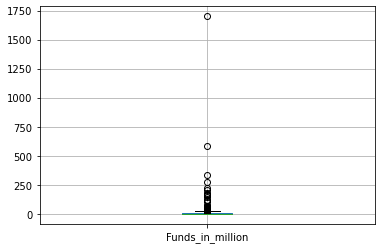

In [46]:
# 3. C. Plotting box plot for funds in million
boxplot = df.boxplot(column='Funds_in_million')

In [44]:
# 3. D. Checking the number of outliers greater than the upper fence
l_b = df.Funds_in_million.quantile(0.25)
u_b = df.Funds_in_million.quantile(0.75)
IQR = u_b - l_b

u_outliers = (df.Funds_in_million > (u_b + 1.5 * IQR)).sum()
print("u_outliers :", u_outliers)

u_outliers : 60


In [42]:
# 3. E. Checking frequency of the OperatingState features classes
df.OperatingState.value_counts()

Operating    319
Acquired      66
Closed        57
Ipo            4
Name: OperatingState, dtype: int64

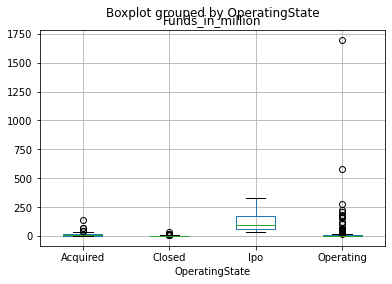

In [47]:
"""INcomplete"""
# 4. A. Is there any significant difference between Funds raised by companies that are still operating vs companies that closed down?

boxplot = df.boxplot(column='Funds_in_million' , by='OperatingState')

In [53]:
"""INcomplete"""
# 4. B.

'INcomplete'

In [49]:
"""INcomplete"""
# 4. B.
    C.
    D.
    

'INcomplete'

In [54]:
# 4. E. Check frequency distribution of Result variables
df.Result.value_counts()

Contestant         312
Finalist            65
Audience choice     25
Winner              25
Runner up           19
Name: Result, dtype: int64

In [56]:
df.head()

,Startup,Product,Funding,Event,Result,OperatingState,Funds_in_million
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed,0.63
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating,1.00
5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired,19.30
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating,29.00
10,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating,1.80


In [111]:
# 4. F. Calculate percentage of winners that are still operating and percentage of contestants that are still operating

# %winners still operating
# opr_winners =df.loc[df['Result'] == 'Winner', df['OperatingState'] == 'Operating'].sum()
# # pcnt_winners = opr_winners/df[]
# opr_winners

n_Winner = df[(df['Result'] == 'Winner')].count()[0]
n_Contestant = df[(df['Result'] == 'Contestant')].count()[0]
opt_Winner = df[(df['Result'] == 'Winner') & 
                      (df['OperatingState'] == 'Operating')].count()[0]
opt_Contestant = df[(df['Result'] == 'Contestant') & 
                      (df['OperatingState'] == 'Operating')].count()[0]
per_Winner = (opt_Winner/n_Winner)*100
print('percentage of winners that are still operating :', per_Winner)
per_Contestant = (opt_Contestant/n_Contestant)*100
print('percentage of contestants that are still operating :', per_Contestant)

percentage of winners that are still operating : 72.0
percentage of contestants that are still operating : 68.58974358974359


In [112]:
'''Incomplete'''
# 4. F.
# 4. G.
# 4. H.

'Incomplete'

In [160]:
# 4. I. Selecting only the Event that has ‘disrupt’ keyword from 2013 onwards
df = df.replace('-',0)
df[(df['Event'].astype('str').str[-4:].astype(int) >= 2013) & (df['Event'].astype('str').str[:7] == 'Disrupt')]

,Startup,Product,Funding,Event,Result,OperatingState,Funds_in_million
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed,0.630
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating,1.000
13,Agrilyst,agrilyst.com,$1M,Disrupt SF 2015,Winner,Operating,1.000
14,Aiden,aiden.ai,$750K,Disrupt London 2016,Contestant,Operating,0.750
16,Aircall,aircall.io,$11.6M,Disrupt SF 2015,Contestant,Operating,11.600
...,...,...,...,...,...,...,...
641,Workspot,workspot.com,$15.8M,Disrupt NYC 2013,Contestant,Operating,15.800
642,Xendo,xendo.com,$28K,Disrupt SF 2014,Contestant,Acquired,0.028
646,YayPay Inc,yaypay.com,$900K,Disrupt London 2015,Contestant,Operating,0.900
656,Zenefits,zenefits.com,$583.6M,Disrupt NYC 2013,Finalist,Operating,583.600
